# Load the Dataset into Pandas

In [2]:
import pandas as pd
file_path = "SuperStore Sales DataSet.csv"
df = pd.read_csv(file_path)              #Replace with your file path

In [3]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returns,Payment Mode
0,CA-2019-160304,1/1/2019,1/7/2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,Maryland,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",73.94,1,28.2668,No,Online
1,CA-2019-160304,1/2/2019,1/7/2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,Maryland,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.94,3,38.2668,No,Online
2,CA-2019-160304,1/2/2019,1/7/2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,Maryland,East,TEC-PH-10000455,Technology,Phones,GE 30522EE2,231.98,2,67.2742,No,Cards
3,CA-2019-125206,1/3/2019,1/5/2019,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,California,West,OFF-ST-10003692,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,114.46,2,28.6150,No,Online
4,US-2019-116365,1/3/2019,1/8/2019,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,Texas,Central,TEC-AC-10002217,Technology,Accessories,Imation Clip USB flash drive - 8 GB,30.08,2,-5.2640,No,Online


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5901 entries, 0 to 5900
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       5901 non-null   object 
 1   Order Date     5901 non-null   object 
 2   Ship Date      5901 non-null   object 
 3   Ship Mode      5901 non-null   object 
 4   Customer ID    5901 non-null   object 
 5   Customer Name  5901 non-null   object 
 6   Segment        5901 non-null   object 
 7   Country        5901 non-null   object 
 8   City           5901 non-null   object 
 9   State          5901 non-null   object 
 10  Region         5901 non-null   object 
 11  Product ID     5901 non-null   object 
 12  Category       5901 non-null   object 
 13  Sub-Category   5901 non-null   object 
 14  Product Name   5901 non-null   object 
 15  Sales          5901 non-null   float64
 16  Quantity       5901 non-null   int64  
 17  Profit         5901 non-null   float64
 18  Returns 

# Data Cleaning

In [5]:
df.isnull().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Profit           0
Returns          0
Payment Mode     0
dtype: int64

## Converting Data Types

In [7]:
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Ship Date"] = pd.to_datetime(df["Ship Date"])

# Data Analysis

## Total Sales by Category

In [8]:
category_sales = df.groupby("Category")["Sales"].sum().reset_index().sort_values(by="Sales", ascending=False)
print(category_sales)

          Category        Sales
1  Office Supplies  643707.6870
2       Technology  470587.9910
0        Furniture  451508.6452


## Visulaizing Sales by Category (Pie Chart)

In [9]:
import matplotlib.pyplot as plt

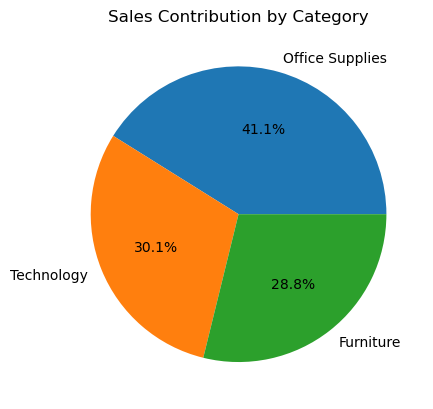

In [11]:
category_sales.plot.pie(y="Sales", autopct="%1.1f%%", labels=category_sales["Category"], legend=False)
plt.title("Sales Contribution by Category")
plt.ylabel("")  # Hides 'Sales' text for cleaner output
plt.show()

## Profit Trend Over Time

In [16]:
#Profit trend by month
df["Order Date"] = pd.to_datetime(df["Order Date"])        #Converting "Order Date" from Object to datetime
df["Order_Month"] = df["Order Date"].dt.to_period("M")     #Extract the month from the "Order Date" column
profit_trend = df.groupby("Order_Month")["Profit"].sum().reset_index()
print(profit_trend)

   Order_Month      Profit
0      2019-01   2853.0901
1      2019-02   5004.5795
2      2019-03   3611.9680
3      2019-04   2977.8149
4      2019-05   8662.1464
5      2019-06   4750.3781
6      2019-07   4432.8779
7      2019-08   2062.0693
8      2019-09   9328.6576
9      2019-10  16243.1425
10     2019-11   4011.4075
11     2019-12  17885.3093
12     2020-01   7140.4391
13     2020-02   1613.8720
14     2020-03  14751.8915
15     2020-04    933.2900
16     2020-05   6342.5828
17     2020-06   8223.3357
18     2020-07   6952.6212
19     2020-08   9040.9557
20     2020-09  10991.5556
21     2020-10   9275.2755
22     2020-11   9690.1037
23     2020-12   8482.7420


## Visulaizing Sales Trend (Line Chart)

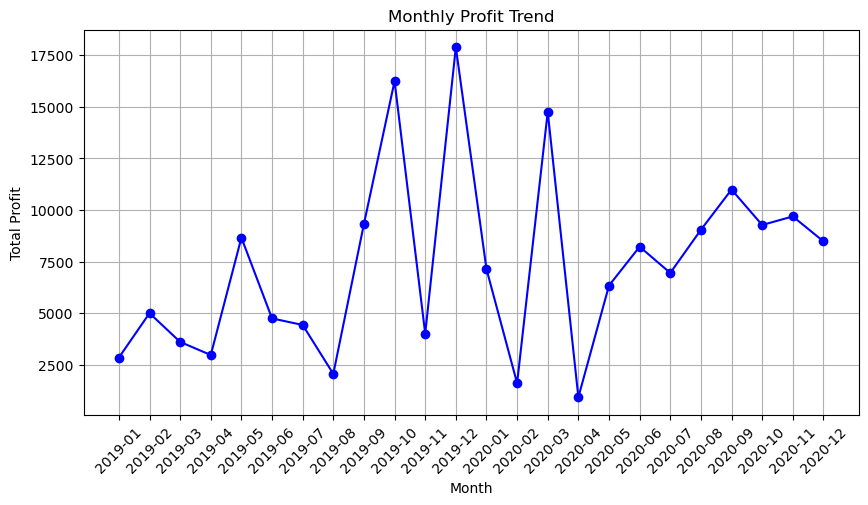

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(profit_trend['Order_Month'].astype(str), profit_trend['Profit'], marker='o', color='blue')
plt.title('Monthly Profit Trend')
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Regional Sales Analysis

In [18]:
region_sales = df.groupby("Region")["Sales"].sum().sort_values(ascending=False)
print(region_sales)

Region
West       522441.0520
East       450234.6660
Central    341007.5242
South      252121.0810
Name: Sales, dtype: float64


## Visulizing Sales by Region (Bar Chart)

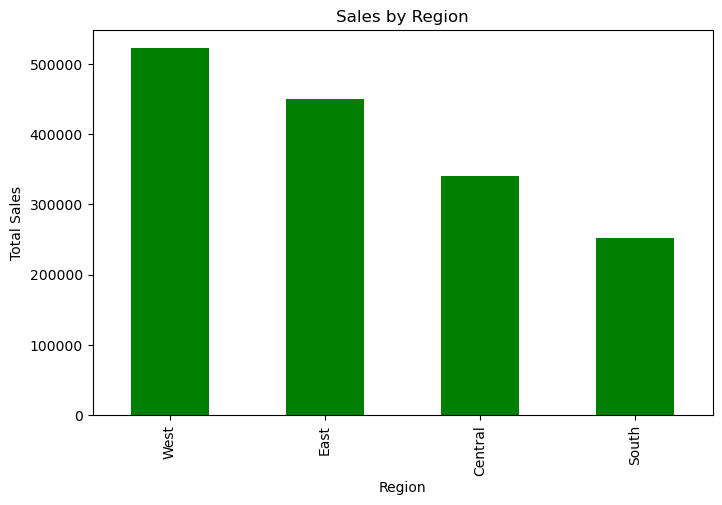

In [20]:
region_sales.plot(kind="bar", color="green", figsize=(8, 5))
plt.title("Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.show()

## Top 5 Most Profitable Sub-Categories

In [25]:
top_subcategories = df.groupby("Sub-Category")["Profit"].sum().nlargest(5).reset_index()
print(top_subcategories)

  Sub-Category      Profit
0      Copiers  42774.5828
1  Accessories  25336.6455
2       Phones  22308.9179
3        Paper  21112.3779
4      Binders  17885.3759


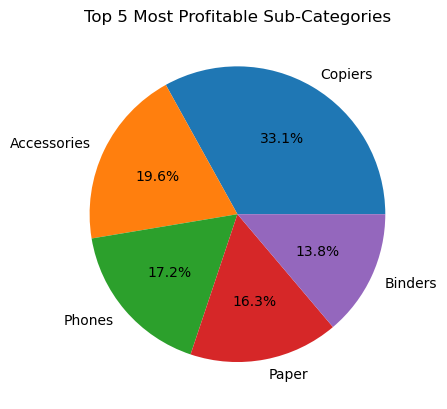

In [26]:
top_subcategories.plot.pie(y="Profit", autopct="%1.1f%%", labels=top_subcategories["Sub-Category"], legend=False)
plt.title("Top 5 Most Profitable Sub-Categories")
plt.ylabel("")  # Hides "Profit" text for cleaner output
plt.show()

# Key Insights

In [28]:
df.to_csv("Cleaned_SuperStore Sales DataSet.csv", index=False)